In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("cancer.csv")

In [4]:
df.head()

,id,thickness,cell_size,cell_shape,adhesion,epith_cell_size,nuclei,chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.tail()

,id,thickness,cell_size,cell_shape,adhesion,epith_cell_size,nuclei,chromatin,nucleoli,mitoses,class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [6]:
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [7]:
df.isnull().sum()

id                 0
thickness          0
cell_size          0
cell_shape         0
adhesion           0
epith_cell_size    0
nuclei             0
chromatin          0
nucleoli           0
mitoses            0
class              0
dtype: int64

In [8]:
data = df.drop('id', axis=1)

In [9]:
data.head()

,thickness,cell_size,cell_shape,adhesion,epith_cell_size,nuclei,chromatin,nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [10]:
data.describe()

,thickness,cell_size,cell_shape,adhesion,epith_cell_size,chromatin,nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


<AxesSubplot:xlabel='class', ylabel='Count'>

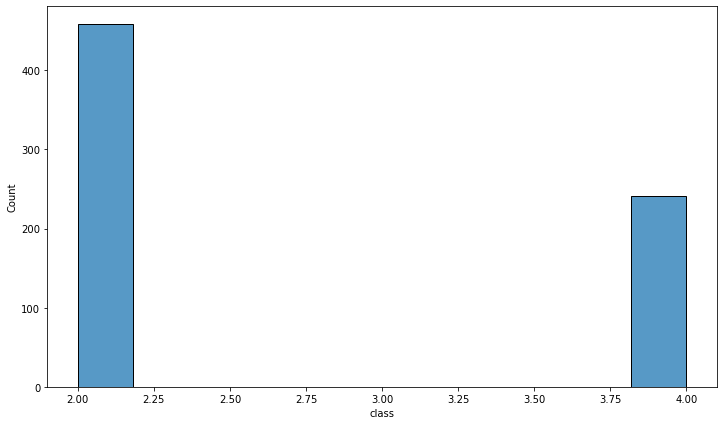

In [11]:
plt.figure(figsize=(12,7))
sns.histplot(data, x='class')

<AxesSubplot:xlabel='thickness', ylabel='Count'>

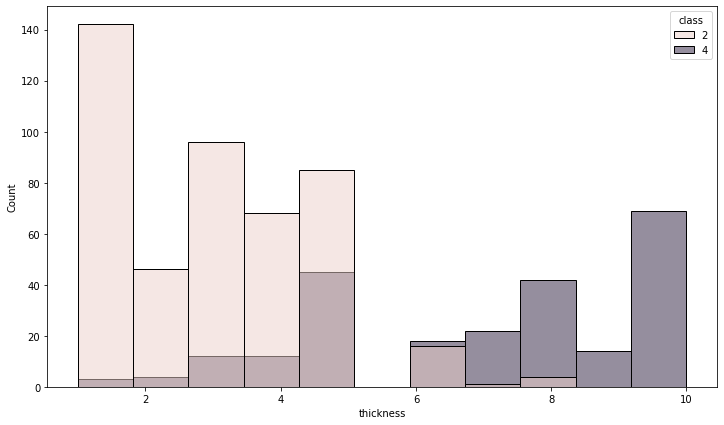

In [12]:
plt.figure(figsize=(12,7))
sns.histplot(data, x='thickness', hue='class')

<AxesSubplot:xlabel='cell_size', ylabel='Count'>

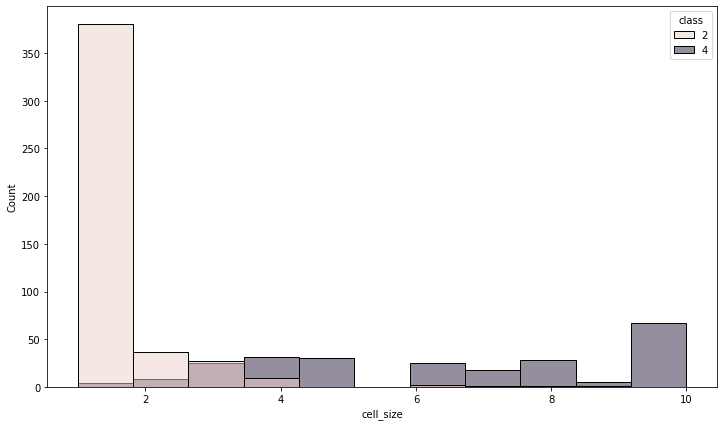

In [13]:
plt.figure(figsize=(12,7))
sns.histplot(data, x='cell_size', hue='class')

<AxesSubplot:xlabel='cell_shape', ylabel='Count'>

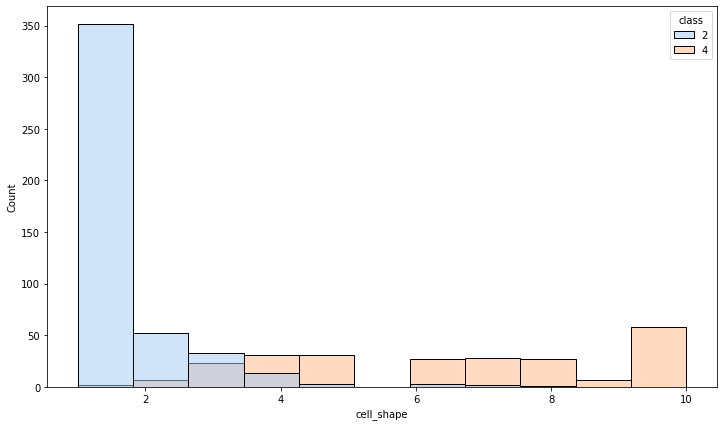

In [14]:
plt.figure(figsize=(12,7))
sns.histplot(data, x='cell_shape', hue='class', palette='pastel')

In [15]:
correlation = data.corr()
correlation['class']

thickness          0.716001
cell_size          0.817904
cell_shape         0.818934
adhesion           0.696800
epith_cell_size    0.682785
chromatin          0.756616
nucleoli           0.712244
mitoses            0.423170
class              1.000000
Name: class, dtype: float64

<AxesSubplot:>

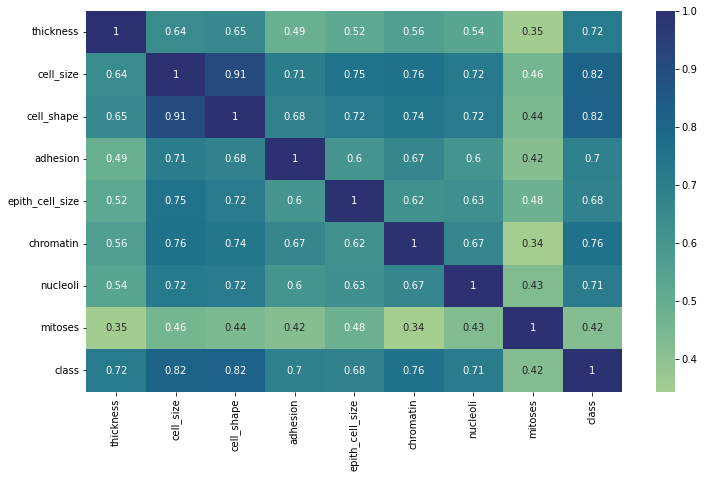

In [16]:
plt.figure(figsize=(12,7))
sns.heatmap(correlation, annot=True, cmap='crest')

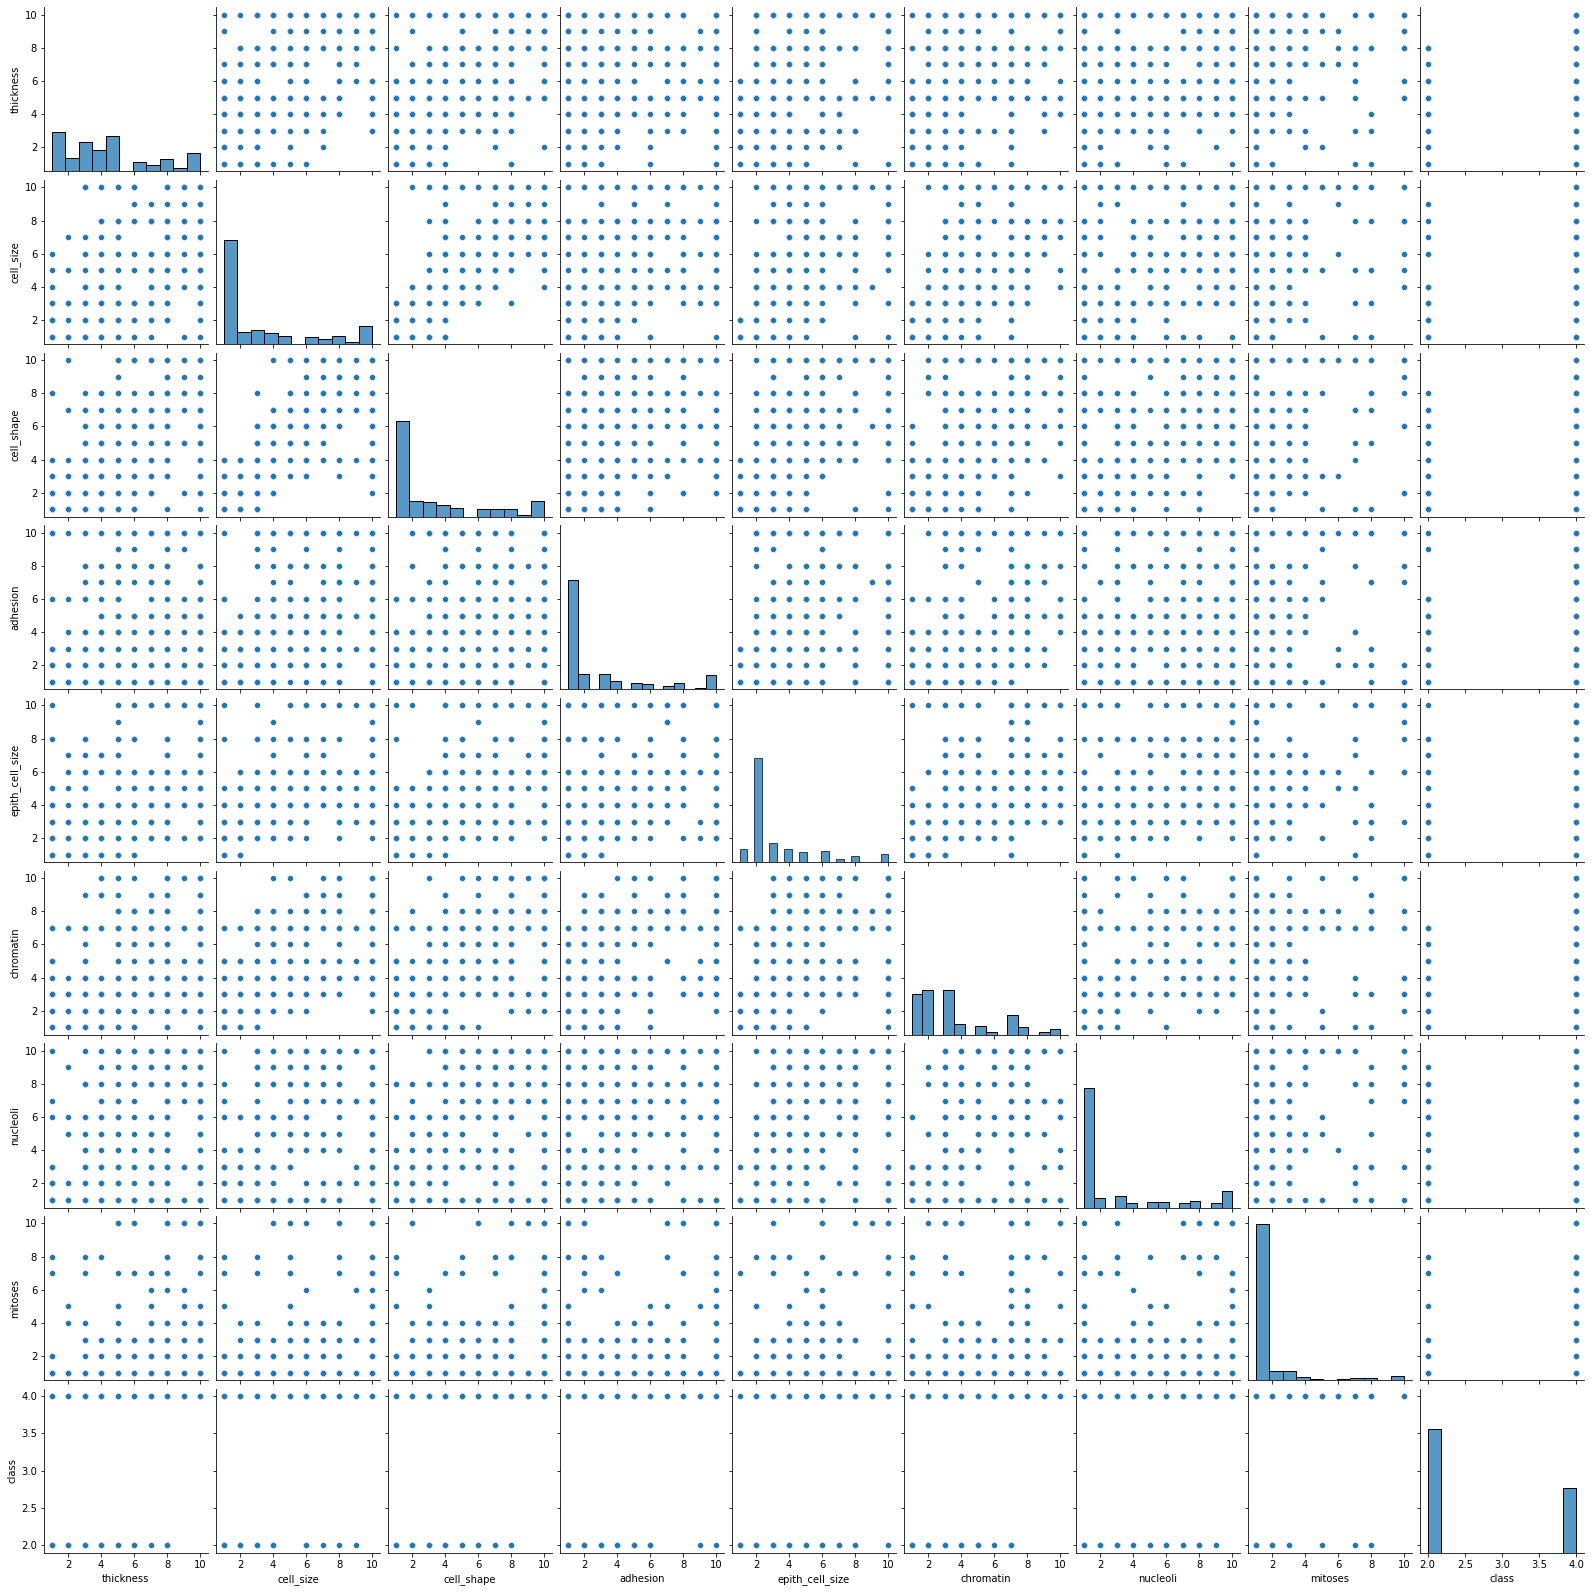

In [17]:
sns.pairplot(data)

In [18]:
data.select_dtypes(exclude=[float,int]).columns

Index(['nuclei'], dtype='object')

In [19]:
data.eq("?").sum()

thickness           0
cell_size           0
cell_shape          0
adhesion            0
epith_cell_size     0
nuclei             16
chromatin           0
nucleoli            0
mitoses             0
class               0
dtype: int64

In [20]:
data['nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: nuclei, dtype: int64

In [21]:
data.select_dtypes(exclude=[float,int]).columns

Index(['nuclei'], dtype='object')

In [22]:
data.nuclei.replace("?", 1, inplace=True)

In [23]:
data.eq("?").sum()

thickness          0
cell_size          0
cell_shape         0
adhesion           0
epith_cell_size    0
nuclei             0
chromatin          0
nucleoli           0
mitoses            0
class              0
dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [25]:
train_feats = train_data.drop('class', axis=1)
train_labels = train_data['class']
test_feats = test_data.drop('class', axis=1)
test_labels = test_data['class']


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

my_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

In [27]:
train_feats_prep = my_pipeline.fit_transform(train_feats)

In [28]:
train_feats_prep

array([[0.44444444, 0.11111111, 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       [0.44444444, 0.22222222, 0.22222222, ..., 0.22222222, 0.33333333,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       ...,
       [0.77777778, 0.33333333, 0.66666667, ..., 0.22222222, 0.88888889,
        0.11111111],
       [1.        , 0.77777778, 1.        , ..., 0.44444444, 0.        ,
        0.        ],
       [0.33333333, 0.        , 0.11111111, ..., 0.22222222, 0.        ,
        0.        ]])

In [41]:
#from sklearn.linear_model import LogisticRegression
#log_model_sc = LogisticRegression()
#log_model_sc

#from sklearn.linear_model import RidgeClassifier
#ridge_model = RidgeClassifier()
#ridge_model

#from sklearn.tree import DecisionTreeClassifier
#dt_model = DecisionTreeClassifier()
#dt_model

# from sklearn.ensemble import RandomForestClassifier
# rf_model = RandomForestClassifier()
# rf_model
from sklearn.svm import SVR
svr_model = SVR()
svr_model

SVR()

In [31]:
#log_model=LogisticRegression()
#log_model

In [42]:
#log_model_sc.fit(train_feats_prep, train_labels)
#ridge_model.fit(train_feats, train_labels)
#dt_model.fit(train_feats, train_labels)
svr_model.fit(train_feats, train_labels)

SVR()

In [43]:
#log_model.fit(train_feats, train_labels)

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
#train_labels_pred = log_model_sc.predict(train_feats_prep)
#train_labels_pred = log_model.predict(train_feats)
train_labels_pred = svr_model.predict(train_feats)

In [47]:
from sklearn.metrics import accuracy_score

accuracy_score(train_labels, train_labels_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [48]:
from sklearn.metrics import classification_report

print(classification_report(train_labels, train_labels_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [49]:
test_feats_prep = my_pipeline.fit_transform(test_feats)

In [39]:
test_labels_pred = rf_model.predict(test_feats)

In [40]:
accuracy_score(test_labels, test_labels_pred)

0.9785714285714285